In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Load KC2 dataset
kc2_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/kc2.csv")

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.corr().defects

In [ ]:
cols = ["loc","uniq_Op","d","uniq_Opnd","total_Opnd","total_Op"]

In [ ]:
df.defects.value_counts()

In [ ]:
df_t = df[df["defects"] == True]

In [ ]:
dim = df_t.shape[1]

In [ ]:
df_t.shape

In [ ]:
df_t = df_t[cols]
cols

In [ ]:
df_t

Balancing using GAN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers, models
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

# Preprocess data
X = kc2_data.drop(columns=["problems"])
y = kc2_data["problems"]

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define GAN architecture
def build_generator(latent_dim, output_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(output_dim, activation='sigmoid'))
    return model

def build_discriminator(input_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=input_dim))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

# Define GAN parameters
latent_dim = 100
output_dim = X.shape[1]
epochs = 10
batch_size = 32

# Build and compile the GAN
generator = build_generator(latent_dim, output_dim)
discriminator = build_discriminator(output_dim)
gan = build_gan(generator, discriminator)

# Train GAN
for epoch in range(epochs):
    for _ in range(batch_size):
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        synthetic_data = generator.predict(noise)
        X_combined = np.concatenate([X.values, synthetic_data])
        y_combined = np.concatenate([y_encoded, np.ones((synthetic_data.shape[0],))]).astype('float32')  # Convert to float32
        X_combined, y_combined = shuffle(X_combined, y_combined)  # Shuffle combined data
        discriminator_loss = discriminator.train_on_batch(X_combined, y_combined)

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        y_gen = np.ones((batch_size,)).astype('float32')  # Convert to float32
        generator_loss = gan.train_on_batch(noise, y_gen)

    print(f"Epoch: {epoch}, D Loss: {discriminator_loss}, G Loss: {generator_loss}")

# Generate synthetic defect data
def generate_synthetic_data(generator, num_samples):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    synthetic_data = generator.predict(noise)
    return synthetic_data


synthetic_data = generate_synthetic_data(generator, num_samples=310)  # Generate synthetic data to match the majority class size

# Combine synthetic data with original data
combined_data = np.concatenate([X.values, synthetic_data])

# Reshape y to match the shape of the synthetic data
y_reshaped = y_encoded.reshape(-1, 1)

# Concatenate reshaped y with an array of ones
combined_target = np.concatenate([y_reshaped, np.ones((synthetic_data.shape[0], 1))]).astype('float32')

# Save balanced dataset to a new file
balanced_kc2 = pd.DataFrame(data=combined_data, columns=X.columns)
balanced_kc2['problems'] = combined_target
balanced_kc2.to_csv("/content/drive/MyDrive/CAPSTONE/new_kc2_GAN.csv", index=False)


1/1 [==============================] - 0s 15ms/step
Epoch: 0, D Loss: [40.908668518066406, 0.7653429508209229], G Loss: 0.8202372193336487
1/1 [==============================] - 0s 15ms/step
Epoch: 1, D Loss: [20.393888473510742, 0.8357400894165039], G Loss: 0.32993194460868835
1/1 [==============================] - 0s 15ms/step
Epoch: 2, D Loss: [12.202427864074707, 0.8447653651237488], G Loss: 0.09517897665500641
1/1 [==============================] - 0s 14ms/step
Epoch: 3, D Loss: [4.703339099884033, 0.8447653651237488], G Loss: 0.0436386913061142
1/1 [==============================] - 0s 27ms/step
Epoch: 4, D Loss: [5.42108154296875, 0.8212996125221252], G Loss: 0.02595464140176773
1/1 [==============================] - 0s 15ms/step
Epoch: 5, D Loss: [4.586730003356934, 0.828519880771637], G Loss: 0.01864977739751339
1/1 [==============================] - 0s 14ms/step
Epoch: 6, D Loss: [3.4822096824645996, 0.8212996125221252], G Loss: 0.013513540849089622
1/1 [=====================

Difference in balance of data for Problems

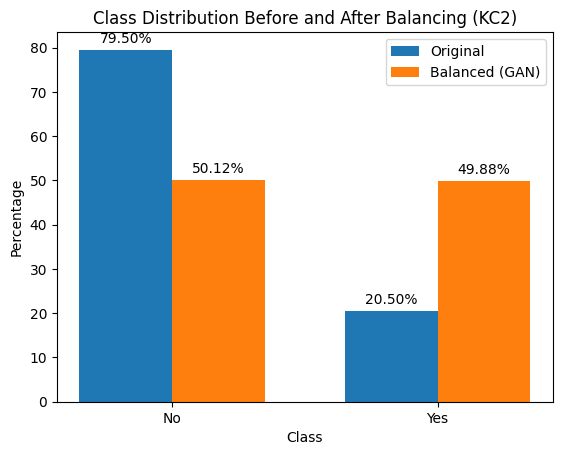

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load original and balanced datasets for KC2
original_data_kc2 = pd.read_csv("/content/drive/MyDrive/CAPSTONE/kc2.csv")
balanced_data_kc2 = pd.read_csv("/content/drive/MyDrive/CAPSTONE/balanced_kc2_GAN.csv")

# Calculate class distribution before and after balancing for KC2
original_class_distribution_kc2 = original_data_kc2['problems'].value_counts(normalize=True) * 100
balanced_class_distribution_kc2 = balanced_data_kc2['problems'].value_counts(normalize=True) * 100

# Plot class distribution before and after balancing for KC2
labels_kc2 = ['No', 'Yes']
width_kc2 = 0.35
x_kc2 = np.arange(len(labels_kc2))

fig_kc2, ax_kc2 = plt.subplots()
rects1_kc2 = ax_kc2.bar(x_kc2 - width_kc2/2, original_class_distribution_kc2, width_kc2, label='Original')
rects2_kc2 = ax_kc2.bar(x_kc2 + width_kc2/2, balanced_class_distribution_kc2, width_kc2, label='Balanced (GAN)')

ax_kc2.set_xlabel('Class')
ax_kc2.set_ylabel('Percentage')
ax_kc2.set_title('Class Distribution Before and After Balancing (KC2)')
ax_kc2.set_xticks(x_kc2)
ax_kc2.set_xticklabels(labels_kc2)
ax_kc2.legend()

# Add percentage labels on top of the bars
def add_percentage_labels_kc2(rects_kc2):
    for rect_kc2 in rects_kc2:
        height_kc2 = rect_kc2.get_height()
        ax_kc2.annotate('{:.2f}%'.format(height_kc2),
                    xy=(rect_kc2.get_x() + rect_kc2.get_width() / 2, height_kc2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_percentage_labels_kc2(rects1_kc2)
add_percentage_labels_kc2(rects2_kc2)

plt.show()

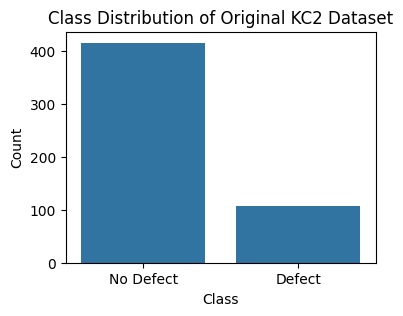

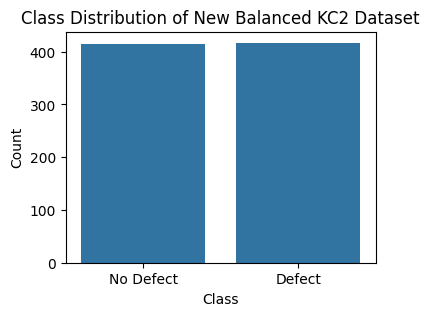

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original KC2 dataset
original_kc2_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/kc2.csv")

# Load the new balanced KC2 dataset
new_kc2_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/new_kc2_GAN.csv")

# Plot the class distribution of the original KC2 dataset
plt.figure(figsize=(4, 3))
sns.countplot(x='problems', data=original_kc2_data)
plt.title('Class Distribution of Original KC2 Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Defect', 'Defect'])
plt.show()

# Plot the class distribution of the new balanced KC2 dataset
plt.figure(figsize=(4, 3))
sns.countplot(x='problems', data=new_kc2_data)
plt.title('Class Distribution of New Balanced KC2 Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Defect', 'Defect'])
plt.show()

ML model training on GAN Balanced KC2 dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Preprocess data
X = new_kc2_data.drop(columns=["problems"])
y = new_kc2_data["problems"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Metrics for Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print("Classification Report:")
print(classification_report_rf)

Metrics for Random Forest Classifier:
Accuracy: 0.8802395209580839
Precision: 0.8831870741276069
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87        74
         1.0       0.92      0.86      0.89        93

    accuracy                           0.88       167
   macro avg       0.88      0.88      0.88       167
weighted avg       0.88      0.88      0.88       167



Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Train SVM Classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
classification_report_svm = classification_report(y_test, y_pred_svm)

print("Metrics for Support Vector Machine (SVM) Classifier:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print("Classification Report:")
print(classification_report_svm)

Metrics for Support Vector Machine (SVM) Classifier:
Accuracy: 0.47305389221556887
Precision: 0.6795017108639863
Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.99      0.62        74
         1.0       0.86      0.06      0.12        93

    accuracy                           0.47       167
   macro avg       0.66      0.53      0.37       167
weighted avg       0.68      0.47      0.34       167



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Classifier
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
classification_report_logreg = classification_report(y_test, y_pred_logreg)

print("Metrics for Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print("Classification Report:")
print(classification_report_logreg)

Metrics for Logistic Regression Classifier:
Accuracy: 0.8982035928143712
Precision: 0.9019764089392276
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        74
         1.0       0.94      0.87      0.91        93

    accuracy                           0.90       167
   macro avg       0.90      0.90      0.90       167
weighted avg       0.90      0.90      0.90       167



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
classification_report_knn = classification_report(y_test, y_pred_knn)

print("Metrics for K-Nearest Neighbors (KNN) Classifier:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print("Classification Report:")
print(classification_report_knn)

Metrics for K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.8862275449101796
Precision: 0.888393810767418
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88        74
         1.0       0.92      0.87      0.90        93

    accuracy                           0.89       167
   macro avg       0.88      0.89      0.89       167
weighted avg       0.89      0.89      0.89       167



Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
classification_report_gb = classification_report(y_test, y_pred_gb)

print("Metrics for Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print("Classification Report:")
print(classification_report_gb)

Metrics for Gradient Boosting Classifier:
Accuracy: 0.8862275449101796
Precision: 0.890030447288025
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88        74
         1.0       0.93      0.86      0.89        93

    accuracy                           0.89       167
   macro avg       0.88      0.89      0.89       167
weighted avg       0.89      0.89      0.89       167



Comparison Between models

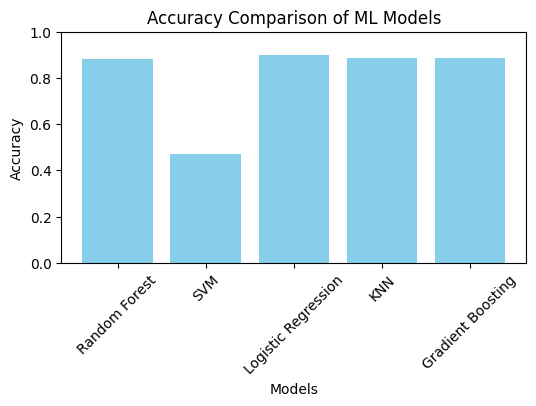

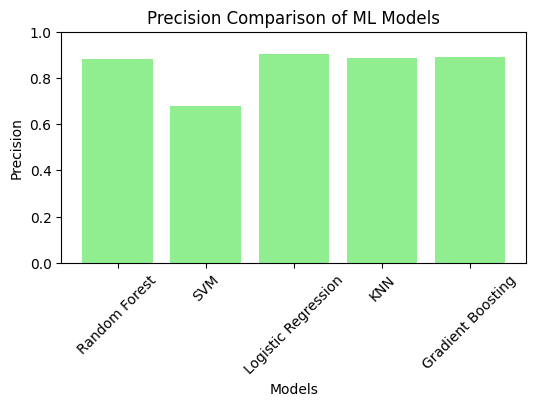

In [ ]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_svm, accuracy_logreg, accuracy_knn, accuracy_gb]
precisions = [precision_rf, precision_svm, precision_logreg, precision_knn, precision_gb]

# Plotting accuracy
plt.figure(figsize=(6, 3))
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting precision
plt.figure(figsize=(6, 3))
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

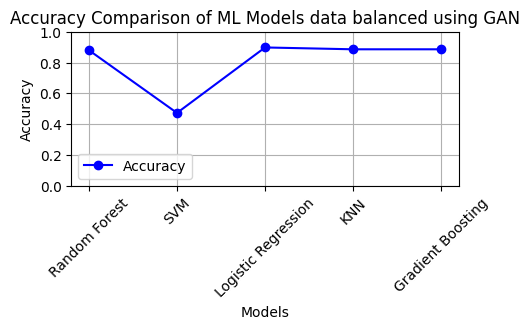

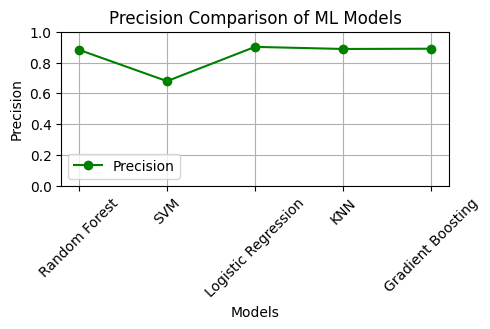

In [ ]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_svm, accuracy_logreg, accuracy_knn, accuracy_gb]
precisions = [precision_rf, precision_svm, precision_logreg, precision_knn, precision_gb]

# Plotting accuracy
plt.figure(figsize=(5, 2))
plt.plot(models, accuracies, marker='o', color='blue', label='Accuracy')
plt.title('Accuracy Comparison of ML Models data balanced using GAN')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting precision
plt.figure(figsize=(5, 2))
plt.plot(models, precisions, marker='o', color='green', label='Precision')
plt.title('Precision Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()